# H&M Personalized Fashion Recommendations: Exploratory Data Analysis (EDA)

Description


In [1]:
import os
import numpy as np 
import pandas as pd

In [2]:
images_path = "../input/h-and-m-personalized-fashion-recommendations/images"
articles_path = "../input/h-and-m-personalized-fashion-recommendations/articles.csv"
customers_path = "../input/h-and-m-personalized-fashion-recommendations/customers.csv"
transactions_path = "../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv"
submission_path = "../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv"

## Articles



In [3]:
# Number of articles for all customers
num_articles = 0
for article in sorted(os.listdir(images_path)):
    customer_folder = os.listdir(os.path.join(images_path, article))
    num_articles += len(customer_folder)
print("Number of articles with images: ", num_articles)

Number of articles with images:  105100


In [4]:
articles_df = pd.read_csv(articles_path)
print(len(articles_df))
articles_df.sort_values(['article_id'], ascending=True).head()

105542


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## Customers
Customers features after processing:
- customer_id - an unique identifier of the customer
- FN - binary feature (0 or 1)
- Active - binary feature (0 or 1)
- club_member_status - status in a club (0, 1, 2 or 3)
- fashion_news_frequency - frequency of sending communication to the customer (0, 1 or 2)
- age - age of the customer
- postal_code - postal code (anonimized), 352 899 unique values

In [5]:
customers_df = pd.read_csv(customers_path)
print(len(customers_df))
customers_df.head()

1371980


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
# Replace NaN values with zeros
customers_df.FN.fillna(0, inplace=True)
customers_df.Active.fillna(0, inplace=True)
customers_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


<AxesSubplot:title={'center':'Active'}, ylabel='customer_id'>

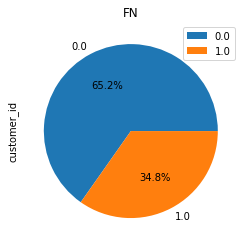

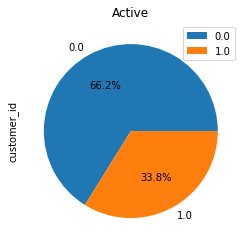

In [7]:
customers_df.groupby('FN').count().plot.pie(y='customer_id', title="FN", autopct='%1.1f%%')
customers_df.groupby('Active').count().plot.pie(y='customer_id', title="Active", autopct='%1.1f%%')


['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']
[1 0 2 3]


<AxesSubplot:xlabel='club_member_status'>

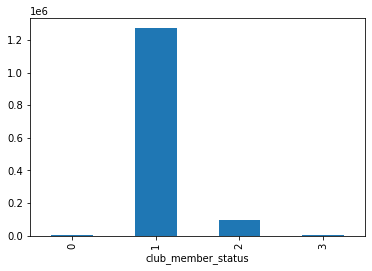

In [8]:
# Property: club_member_status 
# nan -> NON ACTIVE -> 0
# ACTIVE -> 1
# PRE-CREATE -> 2
# LEFT CLUB -> 3
print(customers_df.club_member_status.unique())
customers_df.club_member_status.fillna(0, inplace=True)
customers_df.club_member_status.replace('ACTIVE', 1, inplace=True)
customers_df.club_member_status.replace('PRE-CREATE', 2, inplace=True)
customers_df.club_member_status.replace('LEFT CLUB', 3, inplace=True)
print(customers_df.club_member_status.unique())
customers_df.groupby('club_member_status').count().customer_id.plot(kind='bar')

['NONE' 'Regularly' nan 'Monthly' 'None']
[0 1 2]


<AxesSubplot:title={'center':'fashion_news_frequency'}, xlabel='fashion_news_frequency'>

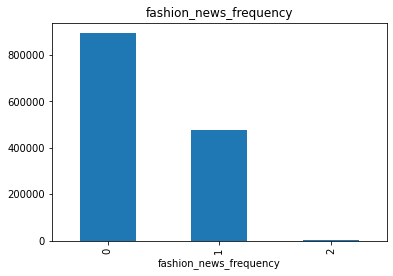

In [9]:
# Property: club_member_status 
# None, nan, NONE -> 0
# Regularly -> 1
# Monthly -> 2
print(customers_df.fashion_news_frequency.unique())
customers_df.fashion_news_frequency.fillna(0, inplace=True)
customers_df.fashion_news_frequency.replace(['NONE', 'None'], 0, inplace=True)
customers_df.fashion_news_frequency.replace('Regularly', 1, inplace=True)
customers_df.fashion_news_frequency.replace('Monthly', 2, inplace=True)
print(customers_df.fashion_news_frequency.unique())
customers_df.groupby('fashion_news_frequency').count().customer_id.plot(kind='bar', title="fashion_news_frequency")

<AxesSubplot:ylabel='Frequency'>

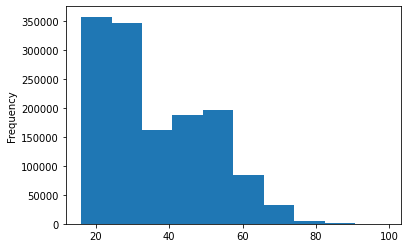

In [10]:
# Property: age 
customers_df.age.fillna(customers_df.age.mean(), inplace=True)
customers_df.age.plot.hist()

In [11]:
# Property: postal_code 
# Postal code 
print(len(customers_df.postal_code.unique()))
# Number of customers per postal code
nb_cs_pc_df = customers_df.groupby('postal_code').count().customer_id


352899


## Transactions

In [12]:
# transactions_df = pd.read_csv(transactions_path)
# print(len(transactions_df))
# transactions_df.head()